# Logistic Function

In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

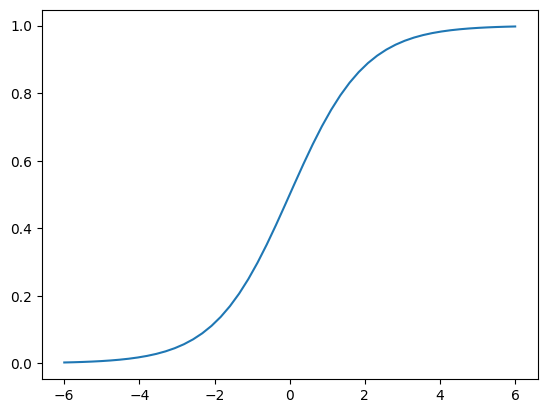

In [58]:
def logistic(x):
    return np.exp(x) / (1 + np.exp(x))

x = np.linspace(-6,6,50,dtype=float)
y = logistic(x)

plt.plot(x,y)

# Logistic Regression

In [59]:
df = pd.read_csv('Day6.csv')
df.sample(6)

,User ID,Gender,Age,EstimatedSalary,Purchased
383,15707634,Male,49,28000,1
106,15706185,Female,26,35000,0
31,15729054,Female,27,137000,1
118,15642725,Male,40,59000,0
243,15769596,Female,56,104000,1
198,15745083,Male,26,80000,0


In [60]:
df.shape

(400, 5)

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [62]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

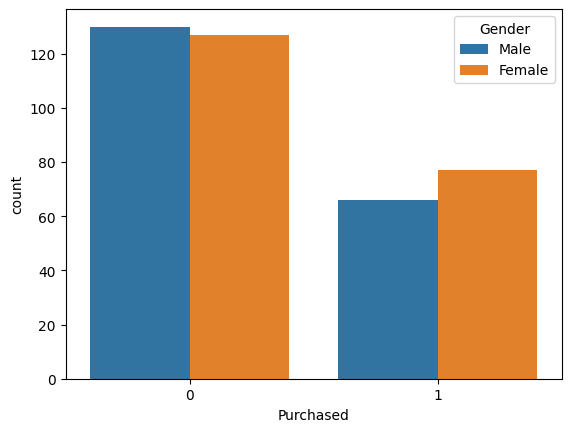

In [63]:
sns.countplot(x=df['Purchased'],hue=df['Gender'])

### In purchased females are more than male and in non purchased males are more than female.

C:\Users\user\AppData\Local\Temp\ipykernel_8904\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

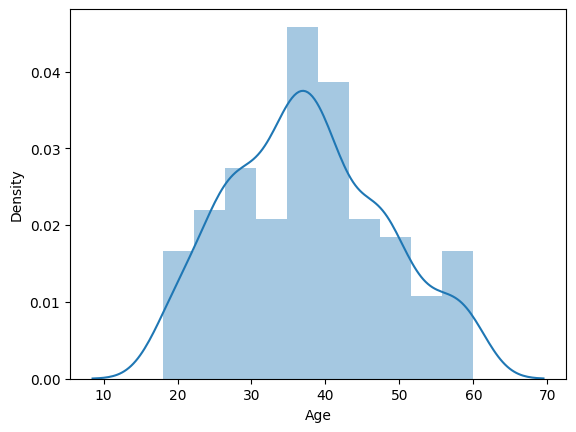

In [64]:
sns.distplot(df['Age'])

## Age group between 35 to 45 are purchasing more than others

<Axes: xlabel='Age', ylabel='Count'>

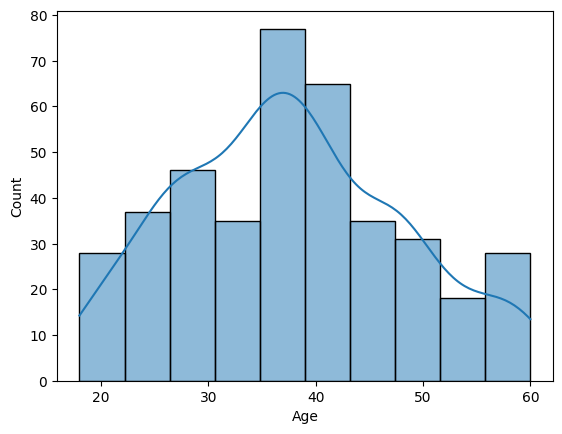

In [65]:
sns.histplot(df["Age"], kde=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8904\2218174724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

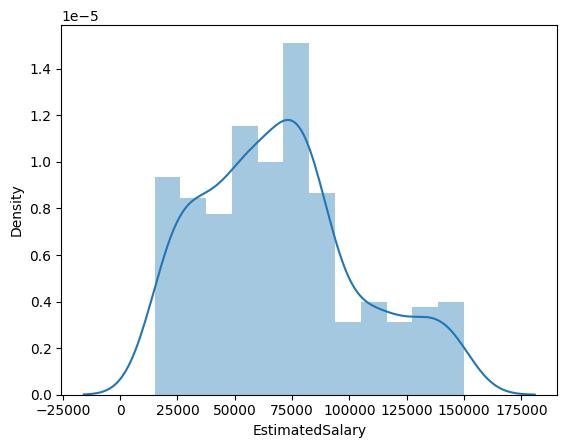

In [66]:
sns.distplot(df['EstimatedSalary'])

## People with salary 75K are more likely to purchased

In [67]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [68]:
X = df[['Age','EstimatedSalary','Gender']]
Y = df['Purchased']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [81]:
X_train
X_test


array([[-0.64807267,  0.53080315,  1.08711461],
       [ 0.07535729, -0.59737588, -0.91986621],
       [-0.19592895,  0.16490725,  1.08711461],
       [-0.64807267,  0.28687255, -0.91986621],
       [-0.19592895, -0.59737588, -0.91986621],
       [-0.9193589 , -1.51211563,  1.08711461],
       [-0.55764392, -1.66457226, -0.91986621],
       [-0.1055002 ,  2.26880869,  1.08711461],
       [-1.7332176 , -0.04853203, -0.91986621],
       [ 0.88921599, -0.81081516,  1.08711461],
       [-0.64807267, -0.6278672 ,  1.08711461],
       [-0.82893016, -0.44491925, -0.91986621],
       [-0.01507146, -0.44491925,  1.08711461],
       [ 0.16578603,  0.2258899 ,  1.08711461],
       [-1.55236011,  0.50031183,  1.08711461],
       [-0.46721518,  1.44554291, -0.91986621],
       [-0.01507146,  0.2258899 ,  1.08711461],
       [-1.64278886,  0.4698205 ,  1.08711461],
       [ 1.61264594,  1.84193014, -0.91986621],
       [-0.19592895, -1.45113298,  1.08711461],
       [-0.19592895, -0.68884985, -0.919

In [71]:
## Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Building with Logistic Regression

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred = model.predict(X_test)

In [74]:
model.score(X_train,y_train)

0.8357142857142857

### Model Evaluation

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[74,  5],
       [ 8, 33]], dtype=int64)

<Axes: >

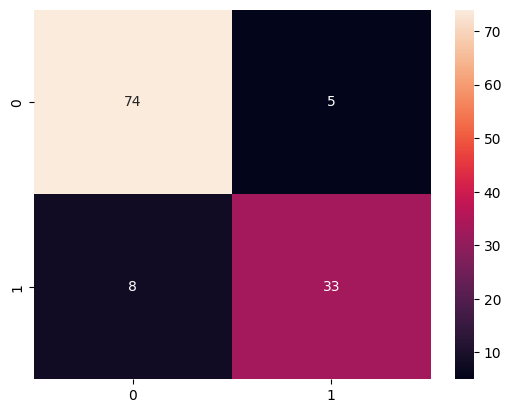

In [77]:
sns.heatmap(cm,annot=True)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [79]:
accuracy_score(y_test,y_pred)

0.8916666666666667